In [2]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img
import pickle
import seaborn as sns

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [5]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl50.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'

rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl50.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'

t1_predict_file_0 = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/both_t1avg_by_fc_maps_0.pkl'
t1_predict_file_10 = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/both_t1avg_by_fc_maps_0to10.pkl'


In [6]:
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)

In [9]:
t1_predict_0 = load_pickle(t1_predict_file_0)
t1_predict_10 = load_pickle(t1_predict_file_10)

In [69]:
vmax = max(np.abs([t1_predict_0['residuals'].min(), t1_predict_0['residuals'].max() 
               #t1_predict_10['residuals'].min(), t1_predict_10['residuals'].max()
                  ]))

sns.set_style('white')
sns.set_context('poster')
cropped_res = []

for data in [t1_predict_0['residuals']]:#, t1_predict_10['residuals']]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot_lh=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], bg_map=lh_sulc, #bg_on_stat=True, 
                                   darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,9) ,threshold=1e-50, cmap='RdBu_r',
                            vmax=vmax, symmetric_cbar='auto')
        cropped_res.append(crop_img(plot_lh))
    for (elev, azim) in [(180, 0), (180, 180)]:    
        plot_rh=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], bg_map=rh_sulc, #bg_on_stat=True, 
                                   darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,7.5) ,threshold=1e-50, cmap='RdBu_r',
                            vmax=vmax, symmetric_cbar='auto')
        cropped_res.append(crop_img(plot_rh))

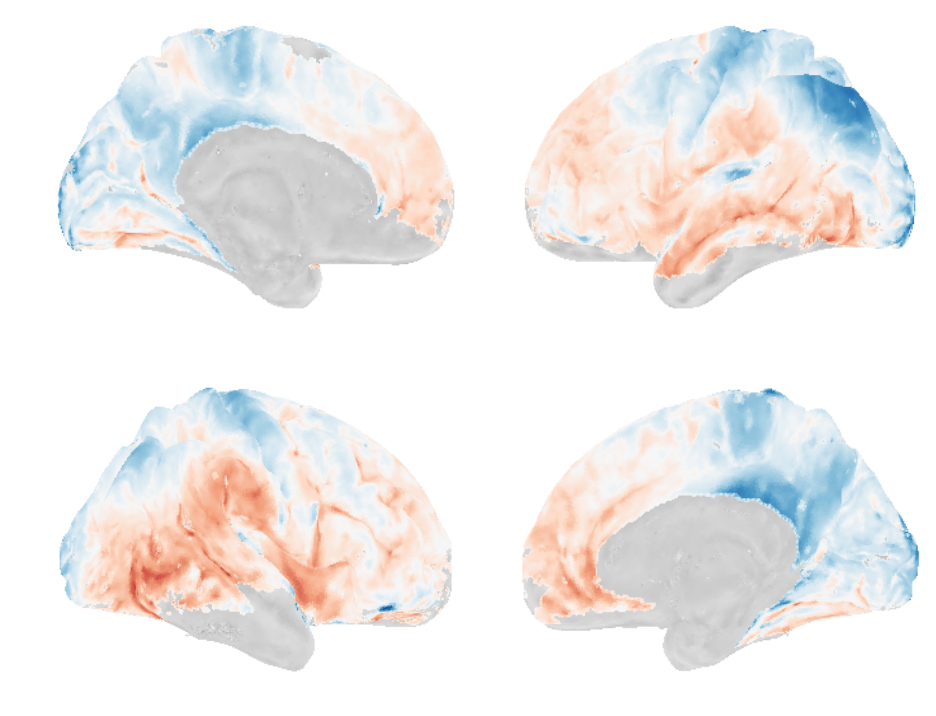

In [70]:
sns.set_style('white')
sns.set_context('poster')

fig = plt.figure(figsize=(20,15))
for img in range(len(cropped_res)):
    ax = fig.add_subplot(3,2,img+1)
    plt.imshow(cropped_res[img])
    ax.set_axis_off()
fig.tight_layout()
fig.subplots_adjust(right=0.65)

### threshold by sdv

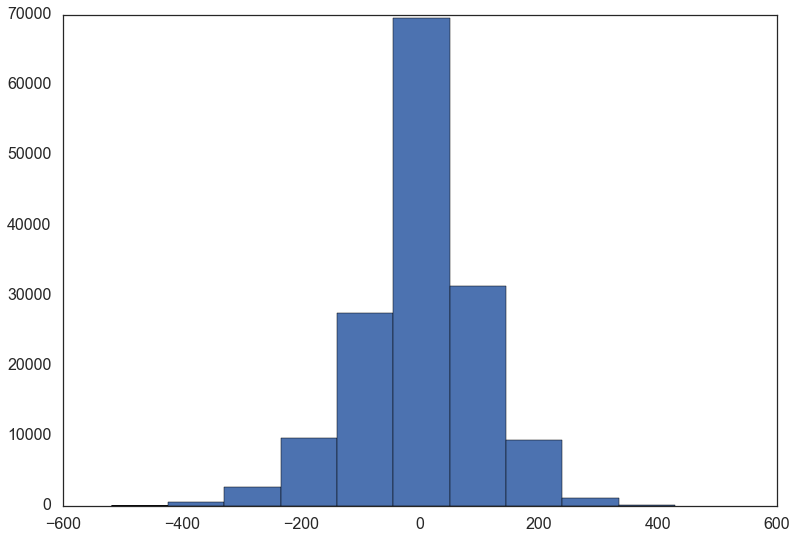

In [24]:
plt.hist(t1_predict_0['residuals']);

In [66]:
thresh_mask = np.ones(t1_predict_0['residuals'].shape)
upper = np.mean(t1_predict_0['residuals']) + 1*np.std(t1_predict_0['residuals'])
lower = np.mean(t1_predict_0['residuals']) - 1*np.std(t1_predict_0['residuals'])
thresh_mask[np.where(t1_predict_0['residuals']<lower)]=0
thresh_mask[np.where(t1_predict_0['residuals']>upper)]=0
thresh_mask = np.asarray(thresh_mask, dtype='int')
thresh_res = np.copy(t1_predict_0['residuals'])
thresh_res[np.where(thresh_mask==1)]=0

In [67]:
vmax = max(np.abs([thresh_res.min(), thresh_res.max()]))

sns.set_style('white')
sns.set_context('poster')
cropped_res_thresh = []

for data in [thresh_res]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot_lh=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], bg_map=lh_sulc, bg_on_stat=True, darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,9) ,threshold=1e-50, cmap='RdBu_r',
                            vmax=vmax, symmetric_cbar='auto')
        cropped_res_thresh.append(crop_img(plot_lh))
    for (elev, azim) in [(180, 0), (180, 180)]:    
        plot_rh=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], bg_map=rh_sulc, bg_on_stat=True, darkness=0.4, 
                            elev=elev,azim=azim, figsize=(10,7.5) ,threshold=1e-50, cmap='RdBu_r',
                            vmax=vmax, symmetric_cbar='auto')
        cropped_res_thresh.append(crop_img(plot_rh))

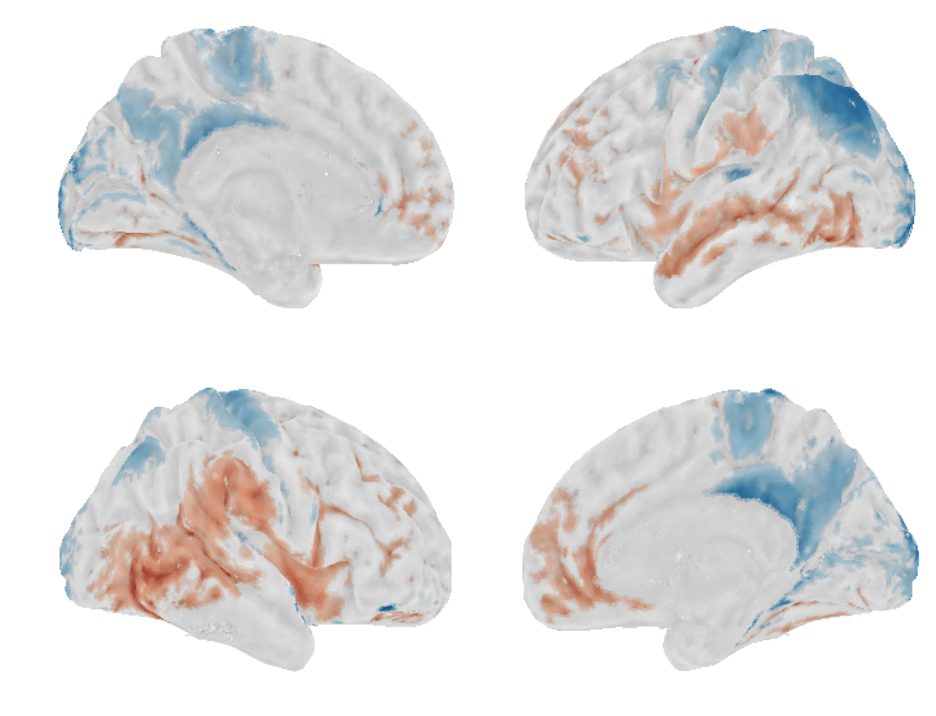

In [68]:
sns.set_style('white')
sns.set_context('poster')

fig = plt.figure(figsize=(20,15))
for img in range(len(cropped_res)):
    ax = fig.add_subplot(3,2,img+1)
    plt.imshow(cropped_res_thresh[img])
    ax.set_axis_off()
fig.tight_layout()
fig.subplots_adjust(right=0.65)